# A simple Linear Regression Model algorithm that predicts the score of a student based on the number of hours they studied

In [3]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#uploading the data from the link provided in the question
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


[]

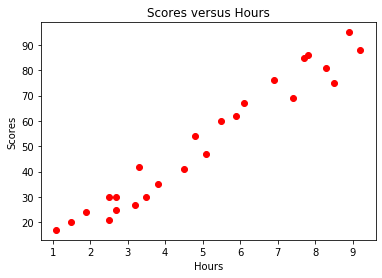

In [6]:
#Scatter plot of Scores vs Hours.
plt.scatter(df.Hours, df.Scores, color = 'red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scores versus Hours")
plt.plot()

In [7]:
#dividing the data in ratio 85:15
div = np.random.rand(len(df)) < 0.85
train = df[div]
test = df[~div]

In [8]:
#Importing the linear regression model from scikit learn
from sklearn import linear_model
lr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("CO-EFFICIENT IS:",lr.coef_)
print("INTERCEPT IS:",lr.intercept_)

CO-EFFICIENT IS: [[9.84811292]]
INTERCEPT IS: [2.39572466]


[]

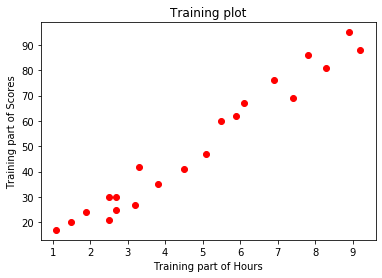

In [10]:
#plotting training data
plt.scatter(train.Hours,train.Scores, color ='red')
plt.xlabel("Training part of Hours")
plt.ylabel("Training part of Scores")
plt.title("Training plot")
plt.plot()

[]

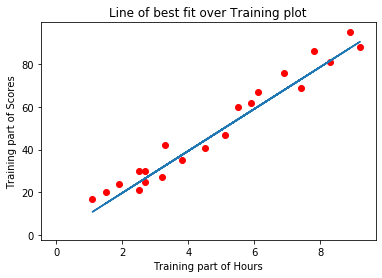

In [11]:
#plotting best fit line on training data
plt.scatter(train.Hours,train.Scores, color ='red')
plt.plot(train_x,lr.coef_[0][0]*train_x,lr.intercept_[0],'-r')
plt.xlabel("Training part of Hours")
plt.ylabel("Training part of Scores")
plt.title("Line of best fit over Training plot")
plt.plot()

In [12]:
print("Score prediction at 9.25 hours:",lr.predict([[9.25]]))

Score prediction at 9.25 hours: [[93.49076915]]


In [13]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = lr.predict(test_x)

In [14]:
mae = np.mean(np.absolute(test_y_-test_y))
mse =np.mean((test_y_-test_y)**2)
r2 = r2_score(test_y_, test_y)
print("MAE is:",mae)
print("MSE is:", mse)
print("R2-Score is:",r2)

MAE is: 7.2689858852408715
MSE is: 58.77309560567428
R2-Score is: 0.8554346529915636
